<a href="https://colab.research.google.com/github/ChristopMD/Machine-Learning/blob/main/Machine_Learning_techniques_(kNN%2C_NB%2C_DT%2C_ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning techniques (kNN, NB, DT, ANN)

* k-Nearest Neighbor
* Naive Bayes
* Desicion Tree
* Artificial Neural Network


##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm

##Dataset

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

##Data visualization

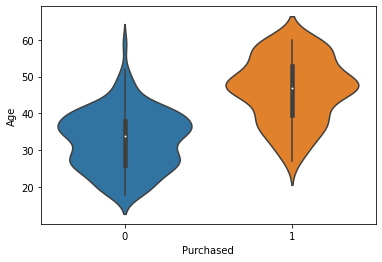

In [ ]:
sns.violinplot(x='Purchased',y='Age',data=data)

In [ ]:
#Podemos concluir de la grafica de violin de "Purchased vs Age" que la mayoria de personas que no comprar tienen una edad alrrededor de 30, mientras las que comprar tienen una edad superior a 40 años

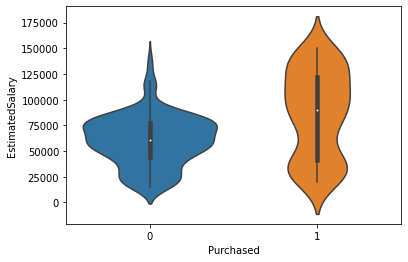

In [ ]:
sns.violinplot(x='Purchased',y='EstimatedSalary',data=data)

In [ ]:
#Podemos concluir de la grafica de violin de "Purchased vs EstimatedSalary" que la mayoria de personas que no compran tienen un salario menor a 75000

##Data Normalization

In [ ]:
X = data[['Age','EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

##k-Nearest Neighbor

In [ ]:
def bestK(min, max, X_train,y_train, X_test):
  maxAUC = -1
  kArray = []
  aucArray = []
  classifier = None
  y_pred = None

  for k in range(min, max):
    kArray.append(k)
    classif = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_prob = classif.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    aucArray.append(roc_auc)

    if maxAUC < roc_auc:
      classifier = classif
      y_pred = classif.predict(X_test)
      maxAUC = roc_auc
  index = aucArray.index(maxAUC)

  return classifier, y_pred, kArray, aucArray, maxAUC, index, false_positive_rate, true_positive_rate

In [ ]:
classifica, y_preddd, kArray, aucArray, maxAUC, k, false_positive_rate_KNN, true_positive_rate_KNN = bestK(1, 20,X_train,y_train,X_test)

El mejor valor de K es:  11
Curva roc:  0.9905956112852665


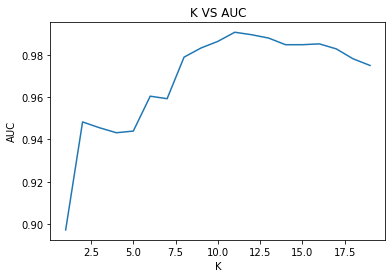

In [ ]:
plt.plot(kArray, aucArray)
plt.xlabel('K')
plt.ylabel('AUC')
plt.title('K VS AUC')
print("El mejor valor de K es: ", kArray[k])
print("Curva roc: ", aucArray[k])


In [ ]:
#Podemos concluir que el mejor "k" para el algoritmo KNN es 11 ya que tiene su curva roc es 0.99 y es mejor que las demas.

##Naive Bayes

In [ ]:
#NAIVE BAYES
classifier = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred_prob = classifier.predict_proba(X_test)

In [ ]:
false_positive_rate_NB, true_positive_rate_NB, thresholds_NB = roc_curve(y_test, y_pred_prob[:,1])

In [ ]:
roc_auc_NB = auc(false_positive_rate_NB, true_positive_rate_NB)
roc_auc_NB

0.9843260188087775

##Decision Tree

In [ ]:
#Decision Tree
classifier = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3).fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred_prob = classifier.predict_proba(X_test)

In [ ]:
false_positive_rate_DT, true_positive_rate_DT, thresholds_DT = roc_curve(y_test, y_pred_prob[:,1])

In [ ]:
roc_auc_DT = auc(false_positive_rate_DT, true_positive_rate_DT)
roc_auc_DT

0.9647335423197492

##Artificial Neural Network

In [ ]:
#ANN
classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
y_pred_prob = classifier.predict_proba(X_test)


In [ ]:
false_positive_rate_ANN, true_positive_rate_ANN, thresholds_ANN = roc_curve(y_test, y_pred_prob[:,1])
roc_auc_ANN = auc(false_positive_rate_ANN, true_positive_rate_ANN)
print('roc: ', roc_auc_ANN)

roc:  0.975705329153605


##Confusion Matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
#Classifiers
classifiers = [GaussianNB(), 
               tree.DecisionTreeClassifier(criterion="entropy",max_depth=3),
               KNeighborsClassifier(n_neighbors=kArray[k]), 
               MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001)]

In [ ]:
def confu_matrix(classifiers, X_train, X_test, y_train, y_test):

  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10))

  for cls, ax in zip(classifiers, axes.flatten()):
    if classifiers.index(cls) == 2:
      X_train = StandardScaler().fit_transform(X_train)
      X_test = StandardScaler().fit_transform(X_test)
    cls.fit(X_train, y_train)
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         normalize= 'true')
    ax.title.set_text(type(cls).__name__)
  plt.tight_layout()  
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


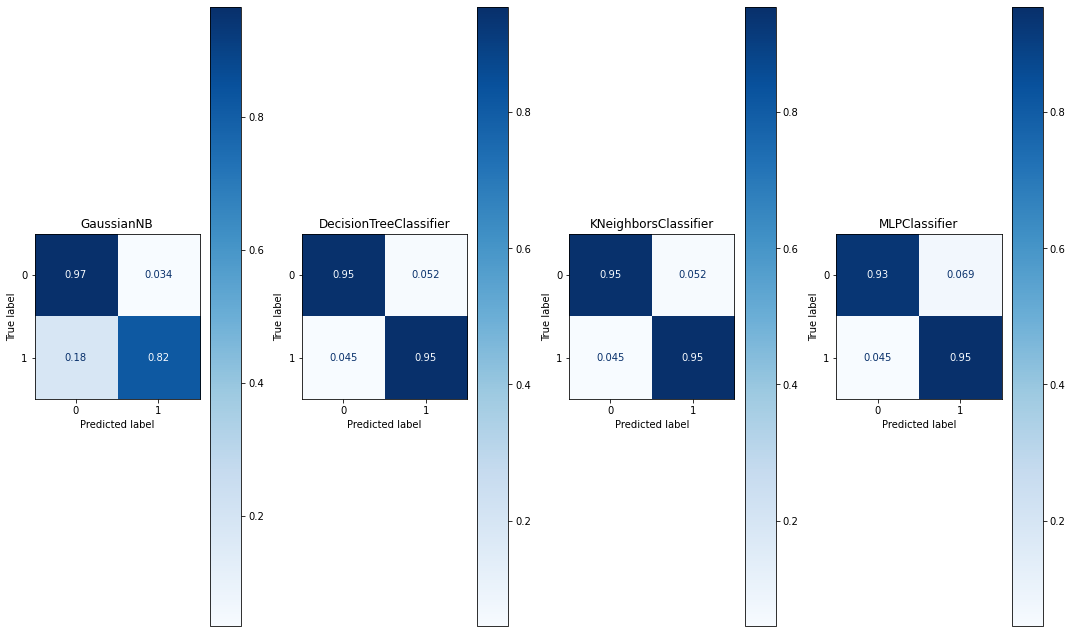

In [ ]:
confu_matrix(classifiers, X_train, X_test, y_train, y_test)

* **Naive Bayes:**

Sensibilidad: 82% -> De 100 clientes que han comprado el modelo identifica a 82

Especificidad: 97% -> De 100 clientes que No han comprado el modelo identifica a 97

* **Decision Tree:**

Sensibilidad: 95% -> De 100 clientes que han comprado el modelo identifica a 95

Especificidad: 95% -> De 100 clientes que No han comprado el modelo identifica a 95

* **k-Nearest Neighbor:**

Sensibilidad: 95% -> De 100 clientes que han comprado el modelo identifica a 95

Especificidad: 95% -> De 100 clientes que No han comprado el modelo identifica a 95

* Artificial Neural Network:

Sensibilidad: 95% -> De 100 clientes que han comprado el modelo identifica a 95

Especificidad: 93% -> De 100 clientes que No han comprado el modelo identifica a 93

##AUC-ROC Curve

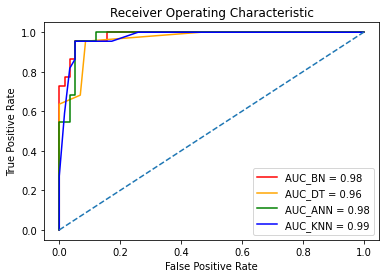

In [ ]:
#PLOT CURVAS ROC
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_NB,true_positive_rate_NB, color='red',label = 'AUC_BN = %0.2f' % roc_auc_NB)
plt.plot(false_positive_rate_DT,true_positive_rate_DT, color='orange',label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(false_positive_rate_ANN,true_positive_rate_ANN, color='green',label = 'AUC_ANN = %0.2f' % roc_auc_ANN)
plt.plot(false_positive_rate_KNN,true_positive_rate_KNN, color='blue',label = 'AUC_KNN = %0.2f' % aucArray[k])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Podemos concluir que el mejor modelo predictivo entre NB, DT, ANN y KNN para el dataset es el modelo KNN con k = 11